In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

LET CHECK OUR DATASET


In [2]:
df=pd.read_csv('Iris.csv')
dfCopy=df.copy()


CHECK OVERVIEW

In [3]:
dfCopy.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


WE DO NOT HAVE NULL VALUE

In [5]:
print(dfCopy['Species'].unique(),"\n\n",dfCopy['Species'].value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 

 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [6]:
dfCopy.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
dfCopy.drop("Id",axis=1,inplace=True)

DATASET IS CLEAR, NOW WE'LL CHECK THE CORRELATİON BY GRAPH

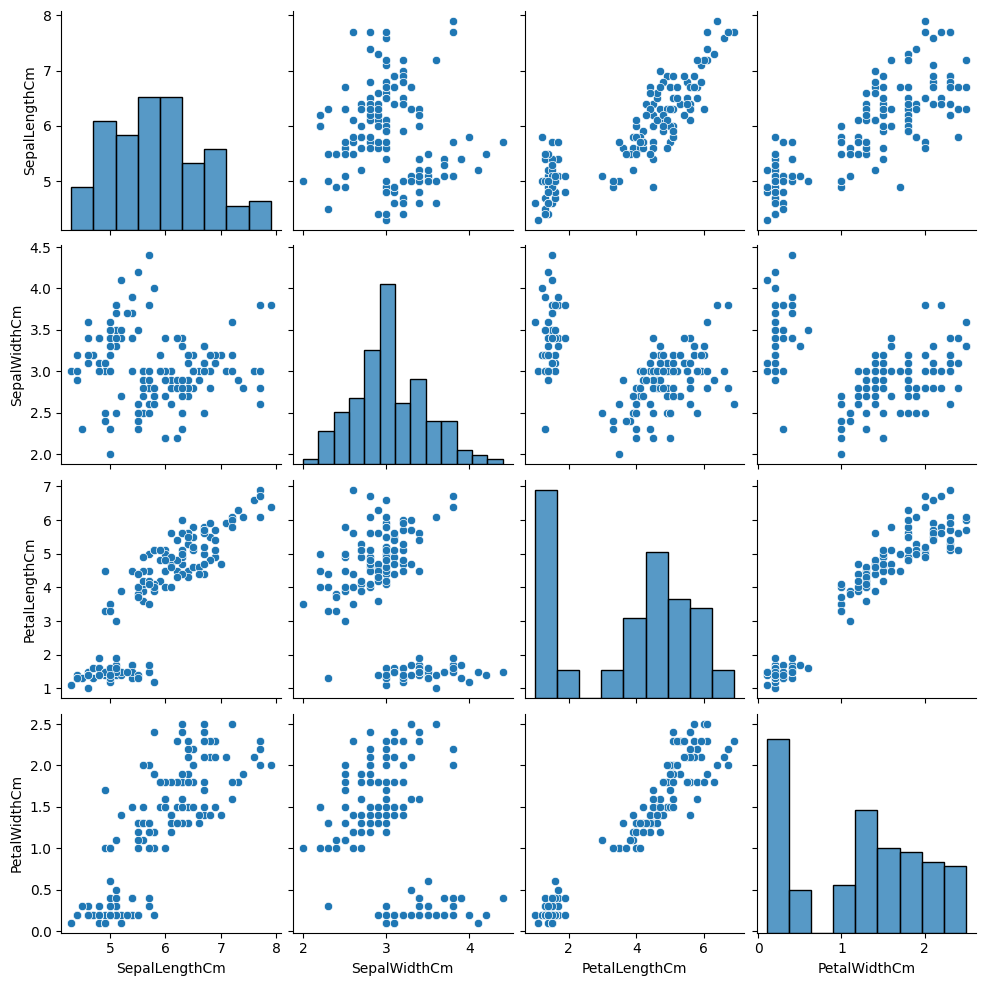

In [8]:
sns.pairplot(dfCopy)
plt.show()

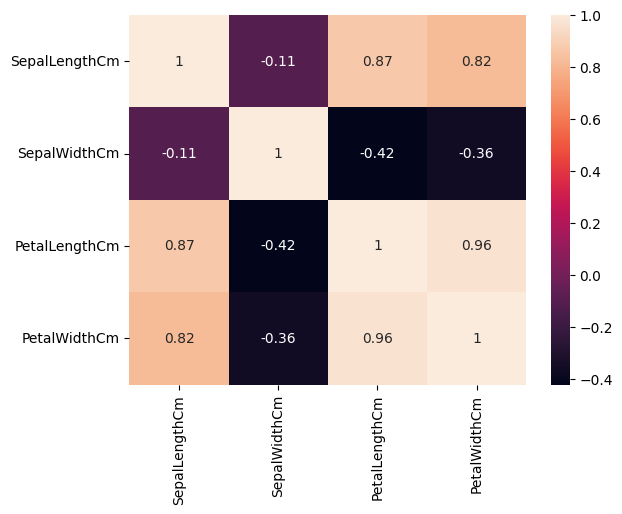

In [9]:
sns.heatmap(dfCopy.corr(numeric_only=True),annot=True)
plt.show()

THERE ARE HIGH CORRELATIONS, LET MAKE A LIST AND CHECK GRAPHS

In [10]:
def checker(dfCopy,threshold):
    corr=dfCopy.corr(numeric_only=True)
    myList=[]
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>threshold:
                myList.append(corr.columns[i])
                myList.append(corr.columns[j])
    return myList
    

In [11]:
x=checker(dfCopy,0.80)
pairs = []
for i in range(0, len(x), 2):
    pairs.append((x[i], x[i+1]))
pairs
    

[('PetalLengthCm', 'SepalLengthCm'),
 ('PetalWidthCm', 'SepalLengthCm'),
 ('PetalWidthCm', 'PetalLengthCm')]

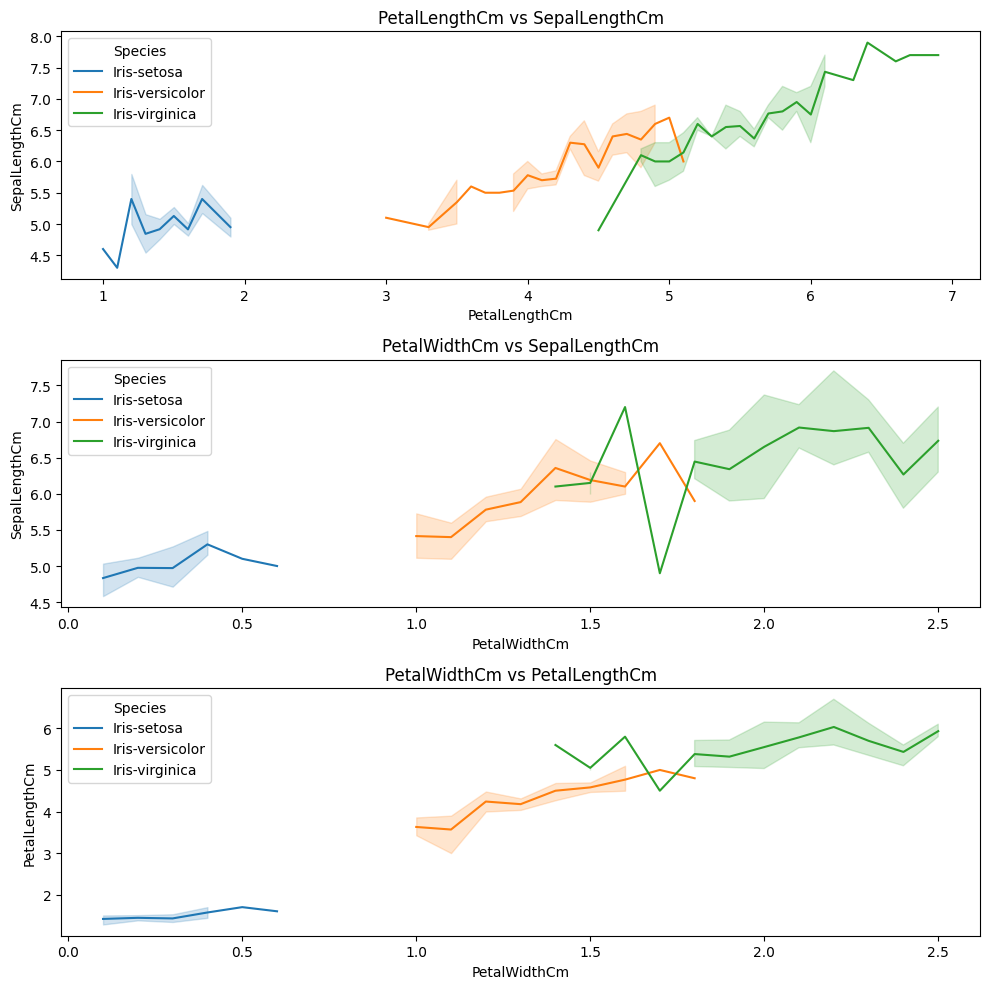

In [12]:
fig,axes=plt.subplots((len(pairs)),1,figsize=(10,10))
axes=axes.flatten()

for ax, (x_col, y_col) in zip(axes, pairs):
    sns.lineplot(data=dfCopy, x=x_col, y=y_col,hue="Species", ax=ax)
    ax.set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()
    

Feature Engineering PART


WE NEED TO CHANGE SPECİES OBJECT TO NUMBER

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()
dfCopy['Species'] = le.fit_transform(dfCopy['Species'])
dfCopy['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

0: IRIS SETOSA 1: IRIS VERSICOLOR 2: IRIS VIRGINICA

LET CLASSIFY OUR DATASET

In [38]:
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve


SEPERATE TO TRAIN AND TEST 


In [16]:
X=dfCopy.drop('Species',axis=1)
y=dfCopy['Species']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

WE ARE SCALING OUR INDEPENDENT FEATURES BECAUSE WE HAVE CONTINUE VALUES. OUR MODEL cOULD EFFECTED BY COEFFICIENTS


In [17]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

LET TRAIN OUR MODEL

WE'LL USE DIFFERENT MODELS AND INDICATE THE MOST EFFICIENT MODEL

In [18]:
gaus=GaussianNB()
gaus.fit(X_train,y_train)
y_pred=gaus.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
conf=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("Accuracy: ",accuracy,"\n")
print("Confusion Matrix: \n",conf,"\n")
print("Classification Report: \n",report)

Accuracy:  0.9666666666666667 

Confusion Matrix: 
 [[11  0  0]
 [ 0 11  1]
 [ 0  0  7]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



VERY ACCURATE MODEL

NOW TRY WITH LOGISTIC REGRESSION (BEFORE HYPERPARAMETER TUNING)

In [19]:
log=LogisticRegression()
log.fit(X_train,y_train)
y_pred=log.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
conf=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("Accuracy: ",accuracy,"\n")
print("Confusion Matrix: \n",conf,"\n")
print("Classification Report: \n",report)

Accuracy:  0.9333333333333333 

Confusion Matrix: 
 [[11  0  0]
 [ 0 10  2]
 [ 0  0  7]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



NOW WITH TUNING

In [20]:
model=LogisticRegression()

penalty=['l1','l2','elasticnet']
c_values=[0.1,0.01,0.001,1,1.01,2,5,10,100]
cv=StratifiedKFold()

'''Do not need class weight because y values are all 50'''

solver=['lbfgs','liblinear','newton-cg','sag','saga','newton-cholesky']
multiClass=['auto','ovr','multinomial']

params=dict(penalty=penalty,C=c_values,solver=solver,multi_class=multiClass)

In [21]:
grid=GridSearchCV(estimator=model,cv=cv,param_grid=params,scoring='accuracy',n_jobs=-1,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.01, 0.001, 1, 1.01, 2, 5, 10, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga', 'newton-cholesky']},
             scoring='accuracy', verbose=1)

BEST PARAMETERS

In [22]:
grid.best_params_

{'C': 1, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}

LET CHECK WHAT IS DIFFERENCES BETWEEN TUNED AND NOT TUNED


In [23]:
y_pred2=grid.predict(X_test)

accuracy=accuracy_score(y_test,y_pred2)
conf=confusion_matrix(y_test,y_pred2)
report=classification_report(y_test,y_pred2)

print("Accuracy: ",accuracy,"\n")
print("Confusion Matrix: \n",conf,"\n")
print("Classification Report: \n",report)

Accuracy:  0.9333333333333333 

Confusion Matrix: 
 [[11  0  0]
 [ 0 10  2]
 [ 0  0  7]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



THERE ARE NO DIFFERENCES BEACUSE VALUES ARE CLOSE THE OPTIMUM AND ALMOST FLAWLESS

LET TRY WITH RANDOMIZED CV

In [24]:
ran=RandomizedSearchCV(estimator=model,cv=cv,param_distributions=params,n_jobs=-1)
ran.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.1, 0.01, 0.001, 1, 1.01, 2, 5,
                                              10, 100],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg', 'sag', 'saga',
                                                   'newton-cholesky']})

In [25]:
ran.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'auto', 'C': 5}

In [28]:
y_pred3=ran.predict(X_test)

accuracy=accuracy_score(y_test,y_pred3)
conf=confusion_matrix(y_test,y_pred3)
report=classification_report(y_test,y_pred3)

print("Accuracy: ",accuracy,"\n")
print("Confusion Matrix: \n",conf,"\n")
print("Classification Report: \n",report)

Accuracy:  0.9333333333333333 

Confusion Matrix: 
 [[11  0  0]
 [ 0 10  2]
 [ 0  0  7]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



THERE ARE NO CHANGES AGAIN

SINCE WE HAVE MULTICLASS DATASET LET TRY ONEvsONE and ONEvsREST

In [33]:
ovo=OneVsOneClassifier(estimator=model)
ovo.fit(X_train,y_train)
y_pred4=ovo.predict(X_test)

accuracy=accuracy_score(y_test,y_pred4)
conf=confusion_matrix(y_test,y_pred4)
report=classification_report(y_test,y_pred4)

print("Accuracy: ",accuracy,"\n")
print("Confusion Matrix: \n",conf,"\n")
print("Classification Report: \n",report)



Accuracy:  0.9333333333333333 

Confusion Matrix: 
 [[11  0  0]
 [ 0 10  2]
 [ 0  0  7]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [34]:
ovr=OneVsRestClassifier(estimator=model)
ovr.fit(X_train,y_train)
y_pred5=ovr.predict(X_test)

accuracy=accuracy_score(y_test,y_pred5)
conf=confusion_matrix(y_test,y_pred5)
report=classification_report(y_test,y_pred5)

print("Accuracy: ",accuracy,"\n")
print("Confusion Matrix: \n",conf,"\n")
print("Classification Report: \n",report)


Accuracy:  0.9333333333333333 

Confusion Matrix: 
 [[11  0  0]
 [ 0 10  2]
 [ 0  0  7]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



AND FINALLY WE TRY WITH SVC

In [37]:
svc=SVC(kernel='linear')

svc.fit(X_train,y_train)
y_pred6=svc.predict(X_test)

accuracy=accuracy_score(y_test,y_pred6)
conf=confusion_matrix(y_test,y_pred6)
report=classification_report(y_test,y_pred6)

print("Accuracy: ",accuracy,"\n")
print("Confusion Matrix: \n",conf,"\n")
print("Classification Report: \n",report)



Accuracy:  0.9333333333333333 

Confusion Matrix: 
 [[11  0  0]
 [ 0 10  2]
 [ 0  0  7]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



SINCE WE HAVE GOOD DISTRUBUTED DATASET, SO OUR MODELS SHOWS UP SAME VALUES